# Project: Wrangle and Analyze Data



### Table of Contents
- Introduction
- Gathering Data. 
- Assessing Data.
- Cleaning data. 
Analyzing and Visualizing Data


#  Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
import csv 
import requests
import tweepy
import json
import re
from datetime import date
import datetime as dt
%matplotlib inline

# Gathering Data

In [2]:
df = pd.read_csv("twitter-archive-enhanced-2.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df.shape

(2356, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file: file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_predictions.head(n=3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
image_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
954,705223444686888960,https://pbs.twimg.com/media/Ccl0-HVVAAAf8aK.jpg,1,Egyptian_cat,0.090508,False,Chesapeake_Bay_retriever,0.077373,True,Mexican_hairless,0.049472,True
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True


In [10]:
consumer_key = 'mWMxupvHdNCdKkSRl289fZZiU'
consumer_secret = "fwOH5PnZ13fRA78dbvG0gKqMD2Rf2MJppzy3oAtzmnsbbMjc4s"
access_token = '934818650514690048-hwdq8iQ7L0axCtRov7KApwClQnGrlFu'
access_secret = 'oMQQeifBKqlUoibZRkr7OtJQD6pi5SubNOGg4f813Ezc2'



In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [12]:
with open('tweet_json.txt', 'w', encoding='utf8') as f:
    for tweet_id in df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [13]:
tweets_data = []
tweet_file = open('tweet_json.txt', 'r')

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
            continue

            tweet_file.close()

In [14]:
tweet_info = pd.DataFrame()

tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data ))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [15]:
tweet_info.shape

(2331, 3)

In [16]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36300
1,892177421306343426,5719,31305
2,891815181378084864,3786,23571
3,891689557279858688,7889,39605
4,891327558926688256,8506,37817


# Assessing Data
Here is assessing the data for quality and tidiness.

In [17]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
1646,683834909291606017,NaN,NaN,2016-01-04 02:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a faulty pupper. Might need to rep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909...,9,10,None,None,None,pupper,None
1264,709918798883774466,NaN,NaN,2016-03-16 01:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Watson. He's a Suzuki Tickleboop. Leader ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709918798...,12,10,Watson,None,None,None,None


In [18]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Jed          1
Rover        1
Bruno        1
Harlso       1
Pumpkin      1
Name: name, Length: 957, dtype: int64

In [23]:
df.tweet_id.duplicated().sum()

0

In [24]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [25]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
fimage =image_predictions[(image_predictions['p1_dog']==False) & (image_predictions['p2_dog']==False) & (image_predictions['p3_dog']==False)]
fimage.count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [29]:
fimage.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
142,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,bustard,0.380772,False,pelican,1.005540e-01,False,crane,8.471350e-02,False
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,3.810980e-01,False,shower_curtain,1.762880e-02,False
986,707693576495472641,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,1,bathtub,0.499525,False,tub,4.880140e-01,False,washbasin,9.298250e-03,False
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,3.452980e-01,False,scuba_diver,7.475390e-02,False


In [115]:
#checking for all value is unique 
print(sum(tweet_info.groupby('tweet_id')['tweet_id'].nunique()))
print(sum(tweet_info.tweet_id.duplicated()))

2331
0


### Quality:
- Drop unnecessary columns
- Change the data type from timestamp to datetime
- update source column from url to text
- make all values in ratings_denominator '10' for consistency
- Drop (not_dogs) where p1, p2, and p3 are false
- Keep real dog and maybe Dog from Dogs Predictions column
- Check rating_numerator outliers
- Change the data type of tweet_id from integer to string
- Clean 'name' column. 

### Tidiness:
- Gather stages of dogs (doggo, puppo, pupper, floofer) into one 
  column 'dog_stage'
- Parse timestamp into separate columns: year, month, day, time
-  Create 'Dogs_Predictions' column (Dog, Maybe Dog, Not Dog)

# Cleaning Data
#### It is where we will fix the quality and tidiness issues that we identified in the assess step and this section consists of the cleaning portion of the data wrangling.

- Define
- Code
- Test


In [30]:
df_clean=df.copy()
t_clean= tweet_info.copy()
i_clean= image_predictions.copy()

In [31]:
df_clean.head(n=3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
df_clean.shape

(2356, 17)

### Define:
#### Drop missing value in df_clean and drop columns unneccessary.

### Code

In [34]:
# drop missing value
df_clean.drop(df_clean[df_clean.retweeted_status_id.notnull()].index, inplace=True)

In [35]:
# drop unnecessary columns
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [36]:
df_clean.shape[1]

12

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define:
#### Merge dog stage columns (doggo, floofer, pupper, puppo) into one 'dog_stage' column. 

### Code

In [43]:
# replace empty value with a space
df_clean.doggo.replace( 'None', '', inplace=True)
df_clean.floofer.replace( 'None', '', inplace=True)
df_clean.pupper.replace( 'None', '', inplace=True)
df_clean.puppo.replace( 'None', '', inplace=True)

In [44]:
# create new column "dog_stage" and merge 4 column 
df_clean['dog_stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [45]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'dog_stage'],
      dtype='object')

In [46]:
df_clean[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].sample(5)

,doggo,floofer,pupper,puppo,dog_stage
2348,,,,,
1807,,,pupper,,pupper
2074,,,,,
2146,,,,,
1466,,,,,


In [47]:
# replace space with NaNs
df_clean.loc[df_clean.dog_stage== '', 'dog_stage'] = np.nan

In [48]:
df_clean.dog_stage = df_clean.dog_stage.fillna('Unknown')
df_clean.dog_stage.value_counts()

Unknown         1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [49]:
# drop unnecessary columns
df_clean.drop(['pupper','doggo','puppo', 'floofer'],axis=1, inplace=True)

### Test

In [50]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Define:
#### Change source links with text string defining the link.

### Code

In [51]:
source_txt = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}

def text_source(df_clean):
    if df_clean['source'] in source_txt.keys():
        abbrev = source_txt[df_clean['source']]
        return abbrev 
    else:
        return df_clean['source']

df_clean['source'] =df_clean.apply(text_source, axis=1)

### Test

In [52]:
df_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define:
#### Merge t_clean and df_clean, through inner join (default) on 'tweet_id'.

### Code

In [53]:
df_master = pd.merge(df_clean, t_clean, on='tweet_id', how = 'inner')

### Test

In [54]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2168 non-null   int64 
 1   timestamp           2168 non-null   object
 2   source              2168 non-null   object
 3   text                2168 non-null   object
 4   expanded_urls       2110 non-null   object
 5   rating_numerator    2168 non-null   int64 
 6   rating_denominator  2168 non-null   int64 
 7   name                2168 non-null   object
 8   dog_stage           2168 non-null   object
 9   retweet_count       2168 non-null   int64 
 10  favorite_count      2168 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 203.2+ KB


In [55]:
df_master.shape

(2168, 11)

In [56]:
df_master.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
dog_stage             object
retweet_count          int64
favorite_count         int64
dtype: object

### Define:
#### Change timestamp to datetime and spread into 4 columns for year, month, day, and time.

### Code

In [57]:
# change the data type from timestamp to datetime
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])


In [58]:
df_master.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
dog_stage                          object
retweet_count                       int64
favorite_count                      int64
dtype: object

In [59]:
# create new columns (year, month, day, time)
df_master['year'] = df_master['timestamp'].dt.year
df_master['month'] = df_master['timestamp'].dt.month
df_master['day'] = df_master['timestamp'].dt.day
df_master['time'] = df_master['timestamp'].dt.time


In [60]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'year', 'month', 'day', 'time'],
      dtype='object')

In [61]:
df_master['year'].value_counts()

2016    1086
2015     687
2017     395
Name: year, dtype: int64

In [62]:
df_master['month'].value_counts()

12    446
11    358
1     265
2     196
3     191
7     149
6     143
4     109
5     105
10     73
9      68
8      65
Name: month, dtype: int64

In [63]:
#Create  new column (WeekDay)
df_master['WeekDay'] = df_master['timestamp'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
df_master['WeekDay'] = df_master['WeekDay'].apply(lambda x: days[x])

### Test

In [64]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2168 non-null   int64              
 1   timestamp           2168 non-null   datetime64[ns, UTC]
 2   source              2168 non-null   object             
 3   text                2168 non-null   object             
 4   expanded_urls       2110 non-null   object             
 5   rating_numerator    2168 non-null   int64              
 6   rating_denominator  2168 non-null   int64              
 7   name                2168 non-null   object             
 8   dog_stage           2168 non-null   object             
 9   retweet_count       2168 non-null   int64              
 10  favorite_count      2168 non-null   int64              
 11  year                2168 non-null   int64              
 12  month               2168 non-null 

In [65]:
df_master['WeekDay'].value_counts()

Mon      357
Tues     326
Weds     320
Fri      303
Thurs    302
Sat      284
Sun      276
Name: WeekDay, dtype: int64

### Define:
#### gathering dog stages from multiple columns into one, creating a “Dogs_Predictions” column (dog, not dog, maybe dog), and combining the three datasets into one. 
  

### Code

In [66]:
#change datatype for (p1_dog, p2_dog, p3_dog) to integer
predictions_dog =['p1_dog', 'p2_dog', 'p3_dog']
for p in predictions_dog:
    i_clean[p] =i_clean[p].astype(int)

In [67]:
# Create new column 'Dogs_Predictions' and insert into the column number of True and False
i_clean['Dogs_Predictions'] = i_clean.p1_dog + i_clean.p2_dog + i_clean.p3_dog

In [68]:
# change the number with a text and the text based on (0, 'Not Dog'), (1 or 2 'Maybe Dog'), (3, 'Dog')
i_clean['Dogs_Predictions'] = i_clean['Dogs_Predictions'].replace(0, 'not dog')
i_clean['Dogs_Predictions'] = i_clean['Dogs_Predictions'].replace(1, 'maybe dog')
i_clean['Dogs_Predictions'] = i_clean['Dogs_Predictions'].replace(2, 'maybe dog')
i_clean['Dogs_Predictions'] = i_clean['Dogs_Predictions'].replace(3, 'real dog')

### Test

In [69]:
#checking based on Dogs Predictions how many real dog, maybe dog, not dog
i_clean.Dogs_Predictions.value_counts()

real dog     1243
maybe dog     508
not dog       324
Name: Dogs_Predictions, dtype: int64

### Define:
#### drop the ( p1 _dog, p2_dog, and p3_dog) columns it is don't needed

### Code

In [70]:
# now i don't needed for ('p1_dog', 'p2_dog', 'p3_dog', 'img_num') so i drop it
i_clean.drop(['p1_dog', 'p2_dog', 'p3_dog', 'img_num'], axis=1, inplace=True)

### Test 

In [71]:
i_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3',
       'p3_conf', 'Dogs_Predictions'],
      dtype='object')

### Define:
#### Join i_clean to df_master on 'tweet_id'

### Code

In [72]:
#Join between df_master and i_clean
df_master = pd.merge(df_master, i_clean, on='tweet_id')

### Test 

In [73]:
# show df_master after join 
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'retweet_count', 'favorite_count', 'year', 'month', 'day', 'time',
       'WeekDay', 'jpg_url', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf',
       'Dogs_Predictions'],
      dtype='object')

### Define:
#### make all values in ratings_denominator '10' for consistency

### Code

In [74]:
# drop 'rating_denominator' 
df_master.drop(['rating_denominator'], axis=1, inplace=True )

In [77]:
# rename 'rating_numerator' to 'The_Rating'
df_master.rename(columns={'rating_numerator': 'The_Rating'}, inplace=True)

### Test

In [76]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'The_Rating', 'name', 'dog_stage', 'retweet_count', 'favorite_count',
       'year', 'month', 'day', 'time', 'WeekDay', 'jpg_url', 'p1', 'p1_conf',
       'p2', 'p2_conf', 'p3', 'p3_conf', 'Dogs_Predictions'],
      dtype='object')

### Define:
#### Clean 'name' column. 

#### Code

In [78]:
df_master['name'].value_counts()

None          546
a              55
Cooper         10
Charlie        10
Oliver         10
             ... 
Pete            1
Champ           1
Crawford        1
Brandonald      1
Jeremy          1
Name: name, Length: 934, dtype: int64

In [79]:
w_name = df_master.name.str.islower()
df_master.loc[w_name, 'name'] = 'None'
df_master.name = df_master.name.str.title()

### Test 

In [80]:
df_master['name'].value_counts()

None       644
Charlie     10
Oliver      10
Cooper      10
Penny        9
          ... 
Sailer       1
Mack         1
Vince        1
Mo           1
Grizzie      1
Name: name, Length: 912, dtype: int64

### Define:
#### For the predictions (p1, p2, p3), remove underscores.

### Code

In [81]:
# replace from '_'  to " "
n_predictions = ['p1', 'p2', 'p3']
for p in n_predictions:
    df_master[p] =df_master[p].str.title().str.replace('_', " ")

### Test

In [82]:
df_master[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
143,Golden Retriever,Labrador Retriever,Saluki
1802,Golden Retriever,Irish Setter,Cocker Spaniel
1814,Comic Book,Bib,Jersey
536,Vizsla,Mongoose,Hatchet
855,Saint Bernard,Collie,Borzoi


In [83]:
df_master[['p1_conf', 'p2_conf', 'p3_conf']].sample(5)

,p1_conf,p2_conf,p3_conf
183,0.450539,0.187928,0.140068
491,0.735480,0.075101,0.036072
125,0.144712,0.106684,0.082610
441,0.461164,0.288650,0.052423
619,0.556595,0.151047,0.096435


### Define:
#### Change confidence levels to a percentage by multiplying by 100

### Code

In [84]:
con = ['p1_conf', 'p2_conf', 'p3_conf']
for c in con:
    df_master[c] =round(df_master[c]*100).astype(int)

### Test

In [85]:
df_master[['p1_conf', 'p2_conf', 'p3_conf']].sample(5)

,p1_conf,p2_conf,p3_conf
1011,90,4,2
502,93,6,0
1897,44,31,3
725,16,11,7
1141,75,12,11


### Define:
#### Keep on the real dog and maybe Dog from Dogs Predictions column

### Code

In [86]:
# get on the real dog and maybe Dog from Dogs Predictions column
df_master = df_master[df_master['Dogs_Predictions'] != "not dog"]

### Test

In [87]:
df_master.Dogs_Predictions.value_counts()

real dog     1196
maybe dog     483
Name: Dogs_Predictions, dtype: int64

### Define:
#### Change the data type of tweet_id from integer to string

### Code

In [88]:
df_master['tweet_id'] = df_master['tweet_id'].astype(str)

### Test

In [89]:
df_master['tweet_id'].describe()

count                   1679
unique                  1679
top       666055525042405380
freq                       1
Name: tweet_id, dtype: object

### Define:
#### Create a copy of the master dataset for known dogs only.

### Code

In [90]:
df_dogs =df_master[df_master['Dogs_Predictions'] == "real dog"].copy()


### Test

In [91]:
df_dogs.Dogs_Predictions.value_counts()

real dog    1196
Name: Dogs_Predictions, dtype: int64

In [92]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 1 to 1986
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1196 non-null   object             
 1   timestamp         1196 non-null   datetime64[ns, UTC]
 2   source            1196 non-null   object             
 3   text              1196 non-null   object             
 4   expanded_urls     1196 non-null   object             
 5   The_Rating        1196 non-null   int64              
 6   name              1196 non-null   object             
 7   dog_stage         1196 non-null   object             
 8   retweet_count     1196 non-null   int64              
 9   favorite_count    1196 non-null   int64              
 10  year              1196 non-null   int64              
 11  month             1196 non-null   int64              
 12  day               1196 non-null   int64              
 13  tim

### Define:
#### drop columns unnecessary

### Code

In [93]:
df_dogs.drop(['year', 'month', 'day', 'time', 'Dogs_Predictions','source','p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf', 'expanded_urls'], axis=1, inplace=True)

### Test

In [94]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 1 to 1986
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1196 non-null   object             
 1   timestamp       1196 non-null   datetime64[ns, UTC]
 2   text            1196 non-null   object             
 3   The_Rating      1196 non-null   int64              
 4   name            1196 non-null   object             
 5   dog_stage       1196 non-null   object             
 6   retweet_count   1196 non-null   int64              
 7   favorite_count  1196 non-null   int64              
 8   WeekDay         1196 non-null   object             
 9   jpg_url         1196 non-null   object             
 10  p1              1196 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 112.1+ KB


In [95]:
df_dogs.reindex(['tweet_id', 'p1', 'rating', 'favorite_count', 'retweet_count', 'dog_stage', 'name', 'text', 'timestamp', 'jpg_url'], axis=1).sample(5)

,tweet_id,p1,rating,favorite_count,retweet_count,dog_stage,name,text,timestamp,jpg_url
1642,672466075045466113,Cocker Spaniel,NaN,1310,512,Unknown,Franq,This is Franq and Pablo. They're working hard ...,2015-12-03 17:23:00+00:00,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg
495,787717603741622272,German Shepherd,NaN,10482,2852,puppo,Tonks,This is Tonks. She is a service puppo. Can hea...,2016-10-16 18:11:26+00:00,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg
542,778650543019483137,German Shepherd,NaN,5872,1532,Unknown,Strider,Meet Strider. He thinks he's a sorority girl. ...,2016-09-21 17:42:10+00:00,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg
995,708130923141795840,French Bulldog,NaN,3378,848,Unknown,None,Please stop sending in non canines like this G...,2016-03-11 03:22:23+00:00,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg
1387,679777920601223168,Bloodhound,NaN,3086,1097,pupper,Rinna,This is Rinna. She's melting. 10/10 get inside...,2015-12-23 21:37:40+00:00,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg


In [96]:
df_dogs.shape

(1196, 11)

In [117]:
df_master.to_csv('twitter_archive_master.csv', index=False)

# Analyzing and Visualizing Data

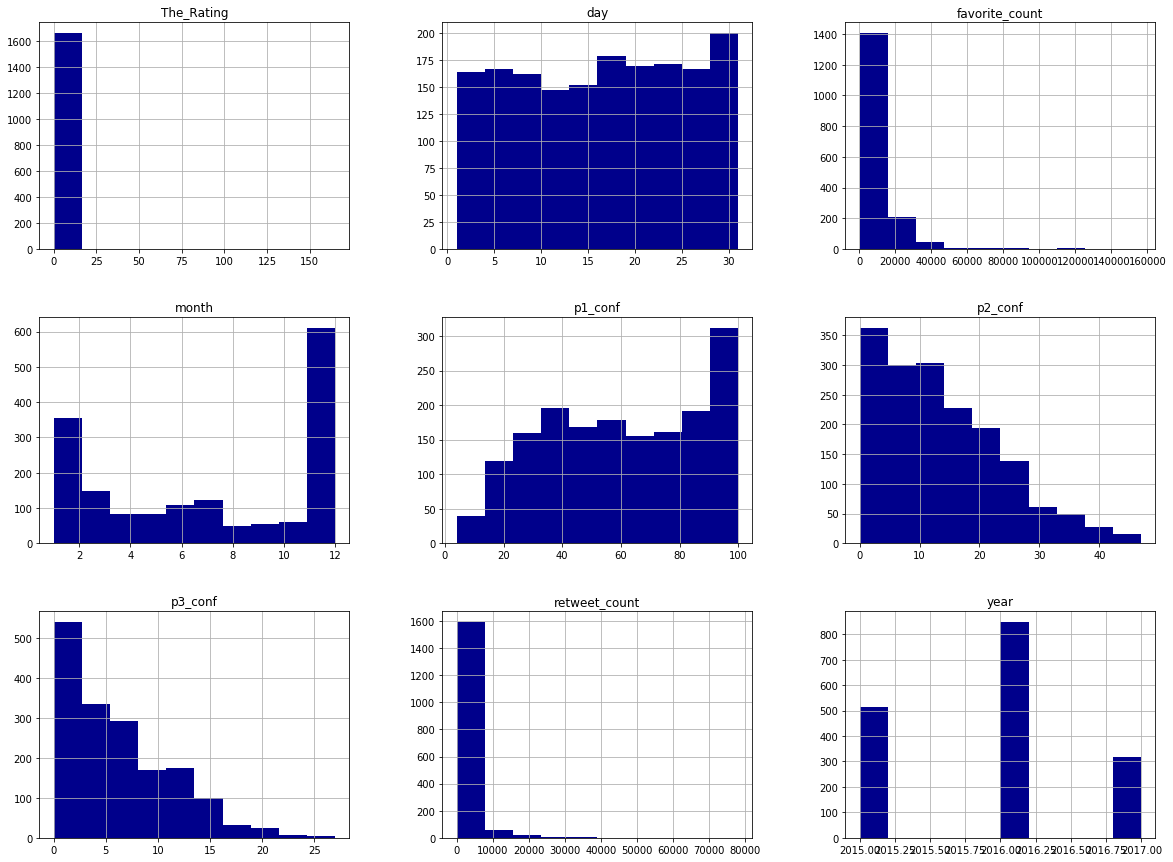

In [90]:
df_master.hist(color='DarkBlue',figsize= (20,15));

In [97]:
df_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

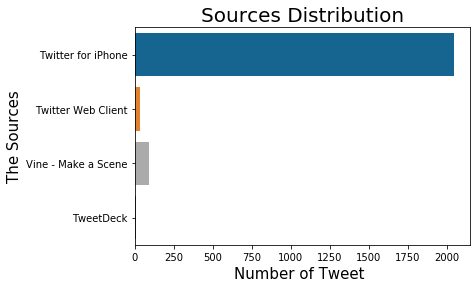

In [98]:
#Most Sources from their iPhone app.
plt.style.use('tableau-colorblind10')
sns.countplot(data = df_clean, y = 'source')
plt.title('Sources Distribution', fontsize=20)
plt.xlabel('Number of Tweet ', fontsize=15)
plt.ylabel('The Sources', fontsize=15)
plt.savefig('tweet-source.png');

In [99]:
df_dogs.nlargest(3, 'favorite_count')

,tweet_id,timestamp,text,The_Rating,name,dog_stage,retweet_count,favorite_count,WeekDay,jpg_url,p1
305,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13,None,puppo,43982,133424,Sat,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier
396,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,13,Stephan,Unknown,56922,121020,Fri,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua
107,866450705531457537,2017-05-22 00:28:40+00:00,This is Jamesy. He gives a kiss to every other...,13,Jamesy,pupper,33055,116716,Mon,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French Bulldog


In [100]:
df_dogs.nlargest(3, 'retweet_count')

,tweet_id,timestamp,text,The_Rating,name,dog_stage,retweet_count,favorite_count,WeekDay,jpg_url,p1
804,739238157791694849,2016-06-04 23:31:25+00:00,Here's a doggo blowing bubbles. It's downright...,13,None,doggo,57873,115719,Sat,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo Dog
396,807106840509214720,2016-12-09 06:17:20+00:00,This is Stephan. He just wants to help. 13/10 ...,13,Stephan,Unknown,56922,121020,Fri,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua
305,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating ...,13,None,puppo,43982,133424,Sat,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier


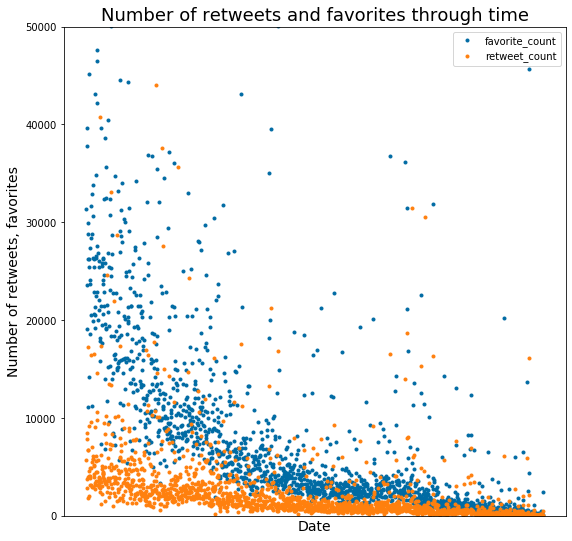

In [101]:
#the favorites are more popular than retweets.
df_master[['favorite_count', 'retweet_count']].plot(style ='.', ylim=[0, 50000], figsize=(9,9))
plt.title('Number of retweets and favorites through time', size=18)
plt.xlabel('Date', size=14)
plt.xticks([], [])
plt.ylabel('Number of retweets, favorites', size=14)
plt.legend(ncol=1, loc='upper right')
plt.savefig('retweets-favorites-time.png');

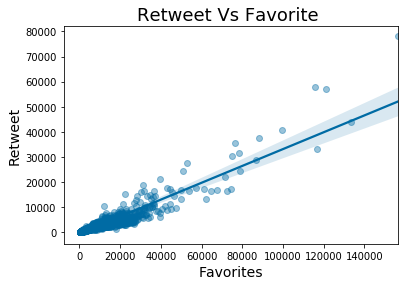

In [102]:
#There is a strong correlation between number of retweets and favorites
sns.regplot(x="favorite_count", y="retweet_count", data=df_master, scatter_kws={'alpha':0.4})
plt.title('Retweet Vs Favorite ', size=18)
plt.xlabel('Favorites', size=14) 
plt.ylabel('Retweet', size=14)
plt.savefig('retweet-favorite.png');

In [103]:
df_master['name'].value_counts()

None      499
Cooper     10
Tucker      9
Oliver      9
Lucy        9
         ... 
Dallas      1
Tuco        1
Olaf        1
Mac         1
Sobe        1
Name: name, Length: 832, dtype: int64

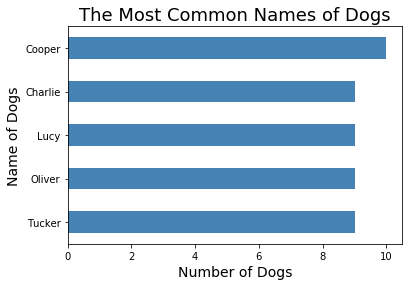

In [104]:
#The Most Common Names of Dogs is Cooper
most_names = df_master.name.value_counts()[1:6].sort_values (axis=0, ascending=True)
most_names.plot(kind = 'barh', color='steelblue')
plt.title('The Most Common Names of Dogs', size=18)
plt.xlabel('Number of Dogs', size=14)
plt.ylabel('Name of Dogs', size=14)
plt.savefig('top-names.png');


In [105]:
df_master['p1'].value_counts()

Golden Retriever      139
Labrador Retriever     93
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Guinea Pig              1
Rapeseed                1
Tabby                   1
Laptop                  1
Tricycle                1
Name: p1, Length: 214, dtype: int64

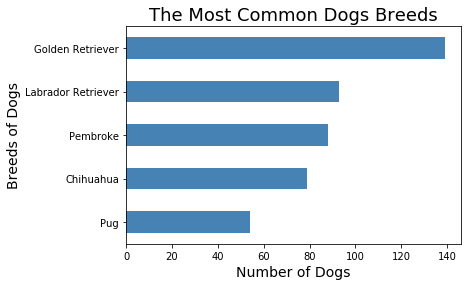

In [106]:
#The most common Breeds of Dogs is Golden Retrievers
most_breeds = df_master.p1.value_counts()[0:5].sort_values(axis=0, ascending=True)
most_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('The Most Common Dogs Breeds', size=18)
plt.xlabel('Number of Dogs', size=14)
plt.ylabel('Breeds of Dogs', size=14)
plt.savefig('top-breeds.png');

In [107]:
df_master['WeekDay'].value_counts()

Mon      281
Tues     244
Thurs    244
Fri      240
Weds     239
Sun      222
Sat      209
Name: WeekDay, dtype: int64

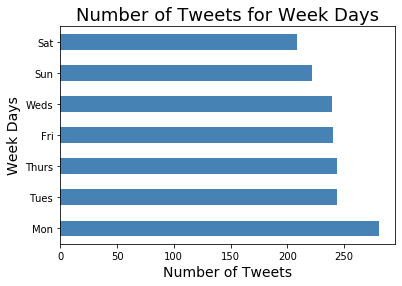

In [108]:
# Most common Days of the week based on the number of tweets is Monday
Number_tweets = df_master['WeekDay'].value_counts()
Number_tweets.plot(kind = 'barh', color='steelblue')
plt.title('Number of Tweets for Week Days', size=18)
plt.xlabel('Number of Tweets', size=14)
plt.ylabel('Week Days', size=14)
plt.savefig('WeekDays.png');

In [109]:
df_master['month'].value_counts()

12    340
11    271
1     200
2     155
3     149
7     123
6     109
5      84
4      84
10     60
9      56
8      48
Name: month, dtype: int64

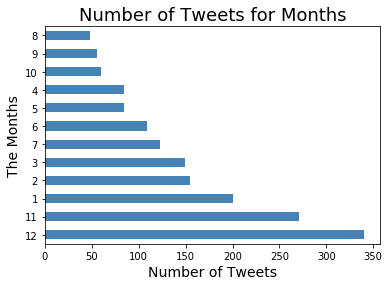

In [110]:
# Most common Months based on the number of tweets is 12
months_t = tweets =df_master['month'].value_counts()
months_t.plot(kind = 'barh', color='steelblue')
plt.title('Number of Tweets for Months', size=18)
plt.xlabel('Number of Tweets', size=14)
plt.ylabel('The Months', size=14)
plt.savefig('month-tweets.png');

In [111]:
df_master['dog_stage'].value_counts()

Unknown         1420
pupper           168
doggo             53
puppo             21
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

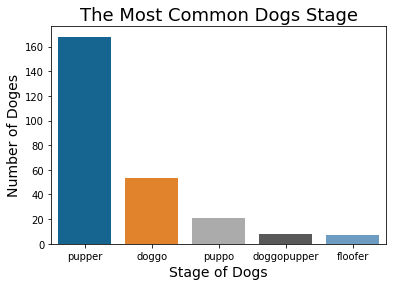

In [112]:
# The most common stage of Dogs is pupper
stage_dogs = df_master['dog_stage'].value_counts()[1:6].index
sns.countplot(data = df_master, x = 'dog_stage', order = stage_dogs , orient = 'h')
plt.title('The Most Common Dogs Stage',fontsize=18)
plt.xlabel('Stage of Dogs', fontsize=14)
plt.ylabel('Number of Doges', fontsize=14)
plt.savefig('top-stages.png');

In [113]:
i_clean['Dogs_Predictions'].value_counts()

real dog     1243
maybe dog     508
not dog       324
Name: Dogs_Predictions, dtype: int64

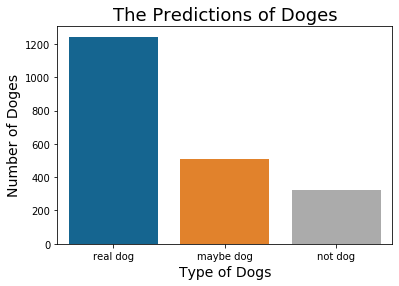

In [114]:
# Real dogs is The most Predictions of Doges 
pre_dogs = i_clean['Dogs_Predictions'].value_counts().index
sns.countplot(data = i_clean, x = 'Dogs_Predictions', order = pre_dogs , orient = 'h')
plt.title('The Predictions of Doges',fontsize=18)
plt.xlabel('Type of Dogs', fontsize=14)
plt.ylabel('Number of Doges', fontsize=14)
plt.savefig('top-stages.png');